### This script contains the following:

#### 1. Importing Libraries and Data
#### 2. Data Cleaning
#### 3. Exploring Relationships
     Pair Plots
     Categorical Plots

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Path
path = r'C:\Users\Family Computer\Documents\Data Analytics\Real Estate Price Prediction'

In [3]:
#Import RDC_inventory_by_month_checked.pkl
df_inventory_by_month=pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'RDC_inventory_by_month_checked.pkl'))

In [4]:
df_inventory_by_month.head()

,month_date_yyyymm,zipcode,city_state,median_listing_price,median_listing_price_mm,median_listing_price_yy,active_listing_count,active_listing_count_mm,active_listing_count_yy,median_days_on_market,...,average_listing_price,average_listing_price_mm,average_listing_price_yy,total_listing_count,total_listing_count_mm,total_listing_count_yy,pending_ratio,pending_ratio_mm,pending_ratio_yy,quality_flag
0,202401,59259,"richey, mt",74000.0,-0.0633,-0.2596,2.0,1.0000,1.0000,59.0,...,74000.0,-0.0633,-0.2596,2.0,1.0000,1.0000,NaN,NaN,NaN,1.0
1,202401,97369,"otter rock, or",28250.0,0.4125,0.0089,8.0,0.0714,-0.1667,53.0,...,130056.0,-0.3904,-0.3683,8.0,0.0714,-0.2857,NaN,NaN,NaN,0.0
2,202401,4922,"burnham, me",187000.0,-0.3200,0.8794,4.0,-0.2000,NaN,81.0,...,207661.0,-0.0844,1.0870,7.0,0.0000,6.0000,0.625,0.225,NaN,1.0
3,202401,49705,"afton, mi",84875.0,0.2125,NaN,1.0,-0.5000,NaN,76.0,...,84875.0,0.2125,NaN,1.0,-0.5000,NaN,2.000,1.000,NaN,0.0
4,202401,11965,"shelter island heights, ny",3097500.0,0.0000,0.2390,4.0,0.0000,3.0000,113.0,...,2830000.0,0.0000,0.1320,4.0,0.0000,3.0000,NaN,NaN,NaN,1.0


In [5]:
df_inventory_by_month.shape

(2577829, 40)

In [6]:
### Permanantly dropping unnecessary columns from the dataframe
df_inventory_by_month_updated = df_inventory_by_month.drop(columns = [ 'median_listing_price_mm', 'median_listing_price_yy', 'active_listing_count_mm', 'active_listing_count_yy', 'median_days_on_market_mm', 'median_days_on_market_yy', 'new_listing_count_mm', 'new_listing_count_yy', 'price_increased_count_mm', 'price_increased_count_yy', 'price_reduced_count_mm', 'price_reduced_count_yy', 'pending_listing_count_mm', 'pending_listing_count_yy', 'median_listing_price_per_square_foot_mm', 'median_listing_price_per_square_foot_yy', 'median_square_feet_mm', 'median_square_feet_yy', 'average_listing_price_mm', 'average_listing_price_yy', 'total_listing_count_mm', 'total_listing_count_yy', 'pending_ratio', 'pending_ratio_mm', 'pending_ratio_yy', 'quality_flag'])

In [7]:
df_inventory_by_month_updated.head()

,month_date_yyyymm,zipcode,city_state,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_listing_price_per_square_foot,median_square_feet,average_listing_price,total_listing_count
0,202401,59259,"richey, mt",74000.0,2.0,59.0,0.0,0.0,0.0,NaN,96.0,824.0,74000.0,2.0
1,202401,97369,"otter rock, or",28250.0,8.0,53.0,2.0,0.0,0.0,NaN,29.0,947.0,130056.0,8.0
2,202401,4922,"burnham, me",187000.0,4.0,81.0,0.0,0.0,0.0,3.0,178.0,907.0,207661.0,7.0
3,202401,49705,"afton, mi",84875.0,1.0,76.0,0.0,0.0,2.0,1.0,91.0,903.0,84875.0,1.0
4,202401,11965,"shelter island heights, ny",3097500.0,4.0,113.0,0.0,0.0,0.0,NaN,1666.0,1798.0,2830000.0,4.0


In [8]:
df_inventory_by_month_updated.shape

(2577829, 14)

In [9]:
df_inventory_by_month_updated.describe()

,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_listing_price_per_square_foot,median_square_feet,average_listing_price,total_listing_count
count,2.570698e+06,2.573096e+06,2.551581e+06,2.574547e+06,2.574547e+06,2.574547e+06,2.004993e+06,2.550241e+06,2.550546e+06,2.570698e+06,2.574547e+06
mean,3.623457e+05,3.211094e+01,7.484090e+01,1.424335e+01,8.682335e-01,8.511866e+00,1.993114e+01,1.833816e+02,2.005202e+03,4.412070e+05,4.734889e+01
std,8.331787e+05,5.837373e+01,5.311582e+01,2.383441e+01,3.957142e+00,1.863953e+01,3.357523e+01,1.222156e+03,1.633779e+04,9.787107e+05,8.017883e+01
min,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.490000e+05,3.000000e+00,3.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,8.900000e+01,1.499000e+03,1.706630e+05,4.000000e+00
50%,2.500000e+05,1.100000e+01,6.200000e+01,4.000000e+00,0.000000e+00,2.000000e+00,6.000000e+00,1.340000e+02,1.817000e+03,2.895000e+05,1.600000e+01
75%,4.097000e+05,3.700000e+01,9.500000e+01,1.800000e+01,0.000000e+00,8.000000e+00,2.400000e+01,2.020000e+02,2.236000e+03,4.825460e+05,5.800000e+01
max,2.790000e+08,2.646000e+03,3.650000e+02,8.020000e+02,2.680000e+02,6.280000e+02,9.760000e+02,7.950000e+05,1.250340e+07,2.790000e+08,2.860000e+03


In [10]:
# Check for missing values
df_inventory_by_month_updated.isnull().sum()

month_date_yyyymm                            0
zipcode                                      0
city_state                                   0
median_listing_price                      7131
active_listing_count                      4733
median_days_on_market                    26248
new_listing_count                         3282
price_increased_count                     3282
price_reduced_count                       3282
pending_listing_count                   572836
median_listing_price_per_square_foot     27588
median_square_feet                       27283
average_listing_price                     7131
total_listing_count                       3282
dtype: int64

In [11]:
#View missing values in median_listing_price                      
df_nan = df_inventory_by_month_updated[df_inventory_by_month_updated['median_listing_price'].isnull()==True]

In [12]:
df_nan

,month_date_yyyymm,zipcode,city_state,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_listing_price_per_square_foot,median_square_feet,average_listing_price,total_listing_count
535,202401,32410,nan,NaN,0.0,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,1.0
646,202401,32572,nan,NaN,2.0,NaN,0.0,4.0,0.0,1.0,NaN,NaN,NaN,3.0
1411,202401,23021,"bohannon, va",NaN,1.0,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,1.0
2228,202401,50559,"lone rock, ia",NaN,0.0,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,1.0
3196,202401,1346,"heath, ma",NaN,0.0,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2563881,201607,16253,"seminole, pa",NaN,1.0,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,1.0
2564475,201607,32422,nan,NaN,1.0,177.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.0
2569716,201607,50578,"ringsted, ia",NaN,1.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1.0
2570028,201607,23479,nan,NaN,1.0,NaN,2.0,0.0,0.0,NaN,NaN,NaN,NaN,1.0


In [13]:
# Find the median value for the median_listing_price column
df_inventory_by_month_updated['median_listing_price'].median()

250000.0

In [14]:
#Replace missing values in the median_listing_price column with the median                    
df_inventory_by_month_updated['median_listing_price'].fillna(250000.0, inplace = True)

In [15]:
# Find the median value for the active_listing_count column
df_inventory_by_month_updated['active_listing_count'].median()

11.0

In [16]:
# Find the mean value for the active_listing_count column
df_inventory_by_month_updated['active_listing_count'].mean()

32.11093872906413

In [17]:
#Replace missing values in the active_listing_count column with the median value                    
df_inventory_by_month_updated['active_listing_count'].fillna(11.0, inplace = True)

In [18]:
# Find the median value for the median_days_on_market column
df_inventory_by_month_updated['median_days_on_market'].median()

62.0

In [19]:
#Replace missing values in the median_days_on_market column with the median value                    
df_inventory_by_month_updated['median_days_on_market'].fillna(62.0, inplace = True)

In [20]:
# Find the median value for the new_listing_count column
df_inventory_by_month_updated['new_listing_count'].median()

4.0

In [21]:
# Find the mean value for the new_listing_count column
df_inventory_by_month_updated['new_listing_count'].mean()

14.243345334150046

In [22]:
#Replace missing values in the new_listing_count column with the mean value                    
df_inventory_by_month_updated['new_listing_count'].fillna(14.0, inplace = True)

In [23]:
# Find the mean value for the price_increased_count column
df_inventory_by_month_updated['price_increased_count'].mean()

0.8682335183626478

In [24]:
#Replace missing values in the price_increased_count column with the mean value                    
df_inventory_by_month_updated['price_increased_count'].fillna(0.8682335183626478, inplace = True)

In [25]:
# Find the mean value for the price_reduced_count column
df_inventory_by_month_updated['price_reduced_count'].mean()

8.511865582566564

In [26]:
#Replace missing values in the price_reduced_count column with the mean value                    
df_inventory_by_month_updated['price_reduced_count'].fillna(8.511865582566564, inplace = True)

In [27]:
#View missing values in pending_listing_count                      
df_nan_1 = df_inventory_by_month_updated[df_inventory_by_month_updated['pending_listing_count'].isnull()==True]

In [28]:
df_nan_1

,month_date_yyyymm,zipcode,city_state,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_listing_price_per_square_foot,median_square_feet,average_listing_price,total_listing_count
0,202401,59259,"richey, mt",74000.0,2.0,59.0,0.0,0.000000,0.000000,NaN,96.0,824.0,74000.0,2.0
1,202401,97369,"otter rock, or",28250.0,8.0,53.0,2.0,0.000000,0.000000,NaN,29.0,947.0,130056.0,8.0
4,202401,11965,"shelter island heights, ny",3097500.0,4.0,113.0,0.0,0.000000,0.000000,NaN,1666.0,1798.0,2830000.0,4.0
5,202401,71841,"gillham, ar",293750.0,2.0,25.0,2.0,0.000000,0.000000,NaN,205.0,1532.0,306250.0,2.0
8,202401,64733,"chilhowee, mo",170000.0,1.0,8.0,4.0,0.000000,0.000000,NaN,115.0,1484.0,170000.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2578017,201607,99663,"seldovia, ak",187000.0,15.0,109.0,0.0,0.000000,4.000000,NaN,142.0,1384.0,199206.0,15.0
2578018,201607,36541,"grand bay, al",173548.0,55.0,64.0,20.0,0.000000,4.000000,NaN,85.0,1881.0,207032.0,55.0
2578019,201607,99688,"willow, ak",182000.0,65.0,61.0,16.0,0.000000,24.000000,NaN,159.0,1216.0,231576.0,65.0
2578020,201607,36053,"midway, al",189500.0,3.0,248.0,0.0,0.000000,0.000000,NaN,76.0,2500.0,229667.0,3.0


In [29]:
# Find the mean value for the pending_listing_count column
df_inventory_by_month_updated['pending_listing_count'].mean()

19.931140407971498

In [30]:
#Replace missing values in the pending_listing_count column with the mean value                    
df_inventory_by_month_updated['pending_listing_count'].fillna(19.931140407971498, inplace = True)

In [31]:
# Find the median value for the median_listing_price_per_square_foot column
df_inventory_by_month_updated['median_listing_price_per_square_foot'].median()

134.0

In [32]:
#Replace missing values in the median_listing_price_per_square_foot column with the median value                    
df_inventory_by_month_updated['median_listing_price_per_square_foot'].fillna(134.0, inplace = True)

In [33]:
# Find the median value for the median_square_feet column
df_inventory_by_month_updated['median_square_feet'].median()

1817.0

In [34]:
#Replace missing values in the median_square_feet column with the median value                    
df_inventory_by_month_updated['median_square_feet'].fillna(1817.0, inplace = True)

In [35]:
# Find the mean value for the average_listing_price column
df_inventory_by_month_updated['average_listing_price'].mean()

441206.95206165797

In [36]:
#Replace missing values in the average_listing_price column with the mean value                    
df_inventory_by_month_updated['average_listing_price'].fillna(441206.95206165797, inplace = True)

In [37]:
# Find the mean value for the total_listing_count column
df_inventory_by_month_updated['total_listing_count'].mean()

47.348889727008284

In [38]:
#Replace missing values in the total_listing_count column with the mean value                    
df_inventory_by_month_updated['total_listing_count'].fillna(47.348889727008284, inplace = True)

In [39]:
# Check for missing values
df_inventory_by_month_updated.isnull().sum()

month_date_yyyymm                       0
zipcode                                 0
city_state                              0
median_listing_price                    0
active_listing_count                    0
median_days_on_market                   0
new_listing_count                       0
price_increased_count                   0
price_reduced_count                     0
pending_listing_count                   0
median_listing_price_per_square_foot    0
median_square_feet                      0
average_listing_price                   0
total_listing_count                     0
dtype: int64

In [40]:
df_inventory_by_month_updated.describe()

,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_listing_price_per_square_foot,median_square_feet,average_listing_price,total_listing_count
count,2.577829e+06,2.577829e+06,2.577829e+06,2.577829e+06,2.577829e+06,2.577829e+06,2.577829e+06,2.577829e+06,2.577829e+06,2.577829e+06,2.577829e+06
mean,3.620349e+05,3.207218e+01,7.471015e+01,1.424304e+01,8.682335e-01,8.511866e+00,1.993114e+01,1.828531e+02,2.003210e+03,4.412070e+05,4.734889e+01
std,8.320464e+05,5.832712e+01,5.286044e+01,2.381924e+01,3.954622e+00,1.862766e+01,2.961068e+01,1.215610e+03,1.625111e+04,9.773560e+05,8.012778e+01
min,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.490000e+05,3.000000e+00,3.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,9.000000e+01,1.500000e+03,1.710130e+05,4.000000e+00
50%,2.500000e+05,1.100000e+01,6.200000e+01,4.000000e+00,0.000000e+00,2.000000e+00,1.300000e+01,1.340000e+02,1.817000e+03,2.900000e+05,1.600000e+01
75%,4.089980e+05,3.700000e+01,9.500000e+01,1.800000e+01,0.000000e+00,8.000000e+00,1.993114e+01,2.010000e+02,2.230000e+03,4.816500e+05,5.800000e+01
max,2.790000e+08,2.646000e+03,3.650000e+02,8.020000e+02,2.680000e+02,6.280000e+02,9.760000e+02,7.950000e+05,1.250340e+07,2.790000e+08,2.860000e+03


### Pair Plots:

### Create a pair plot for the entire dataset

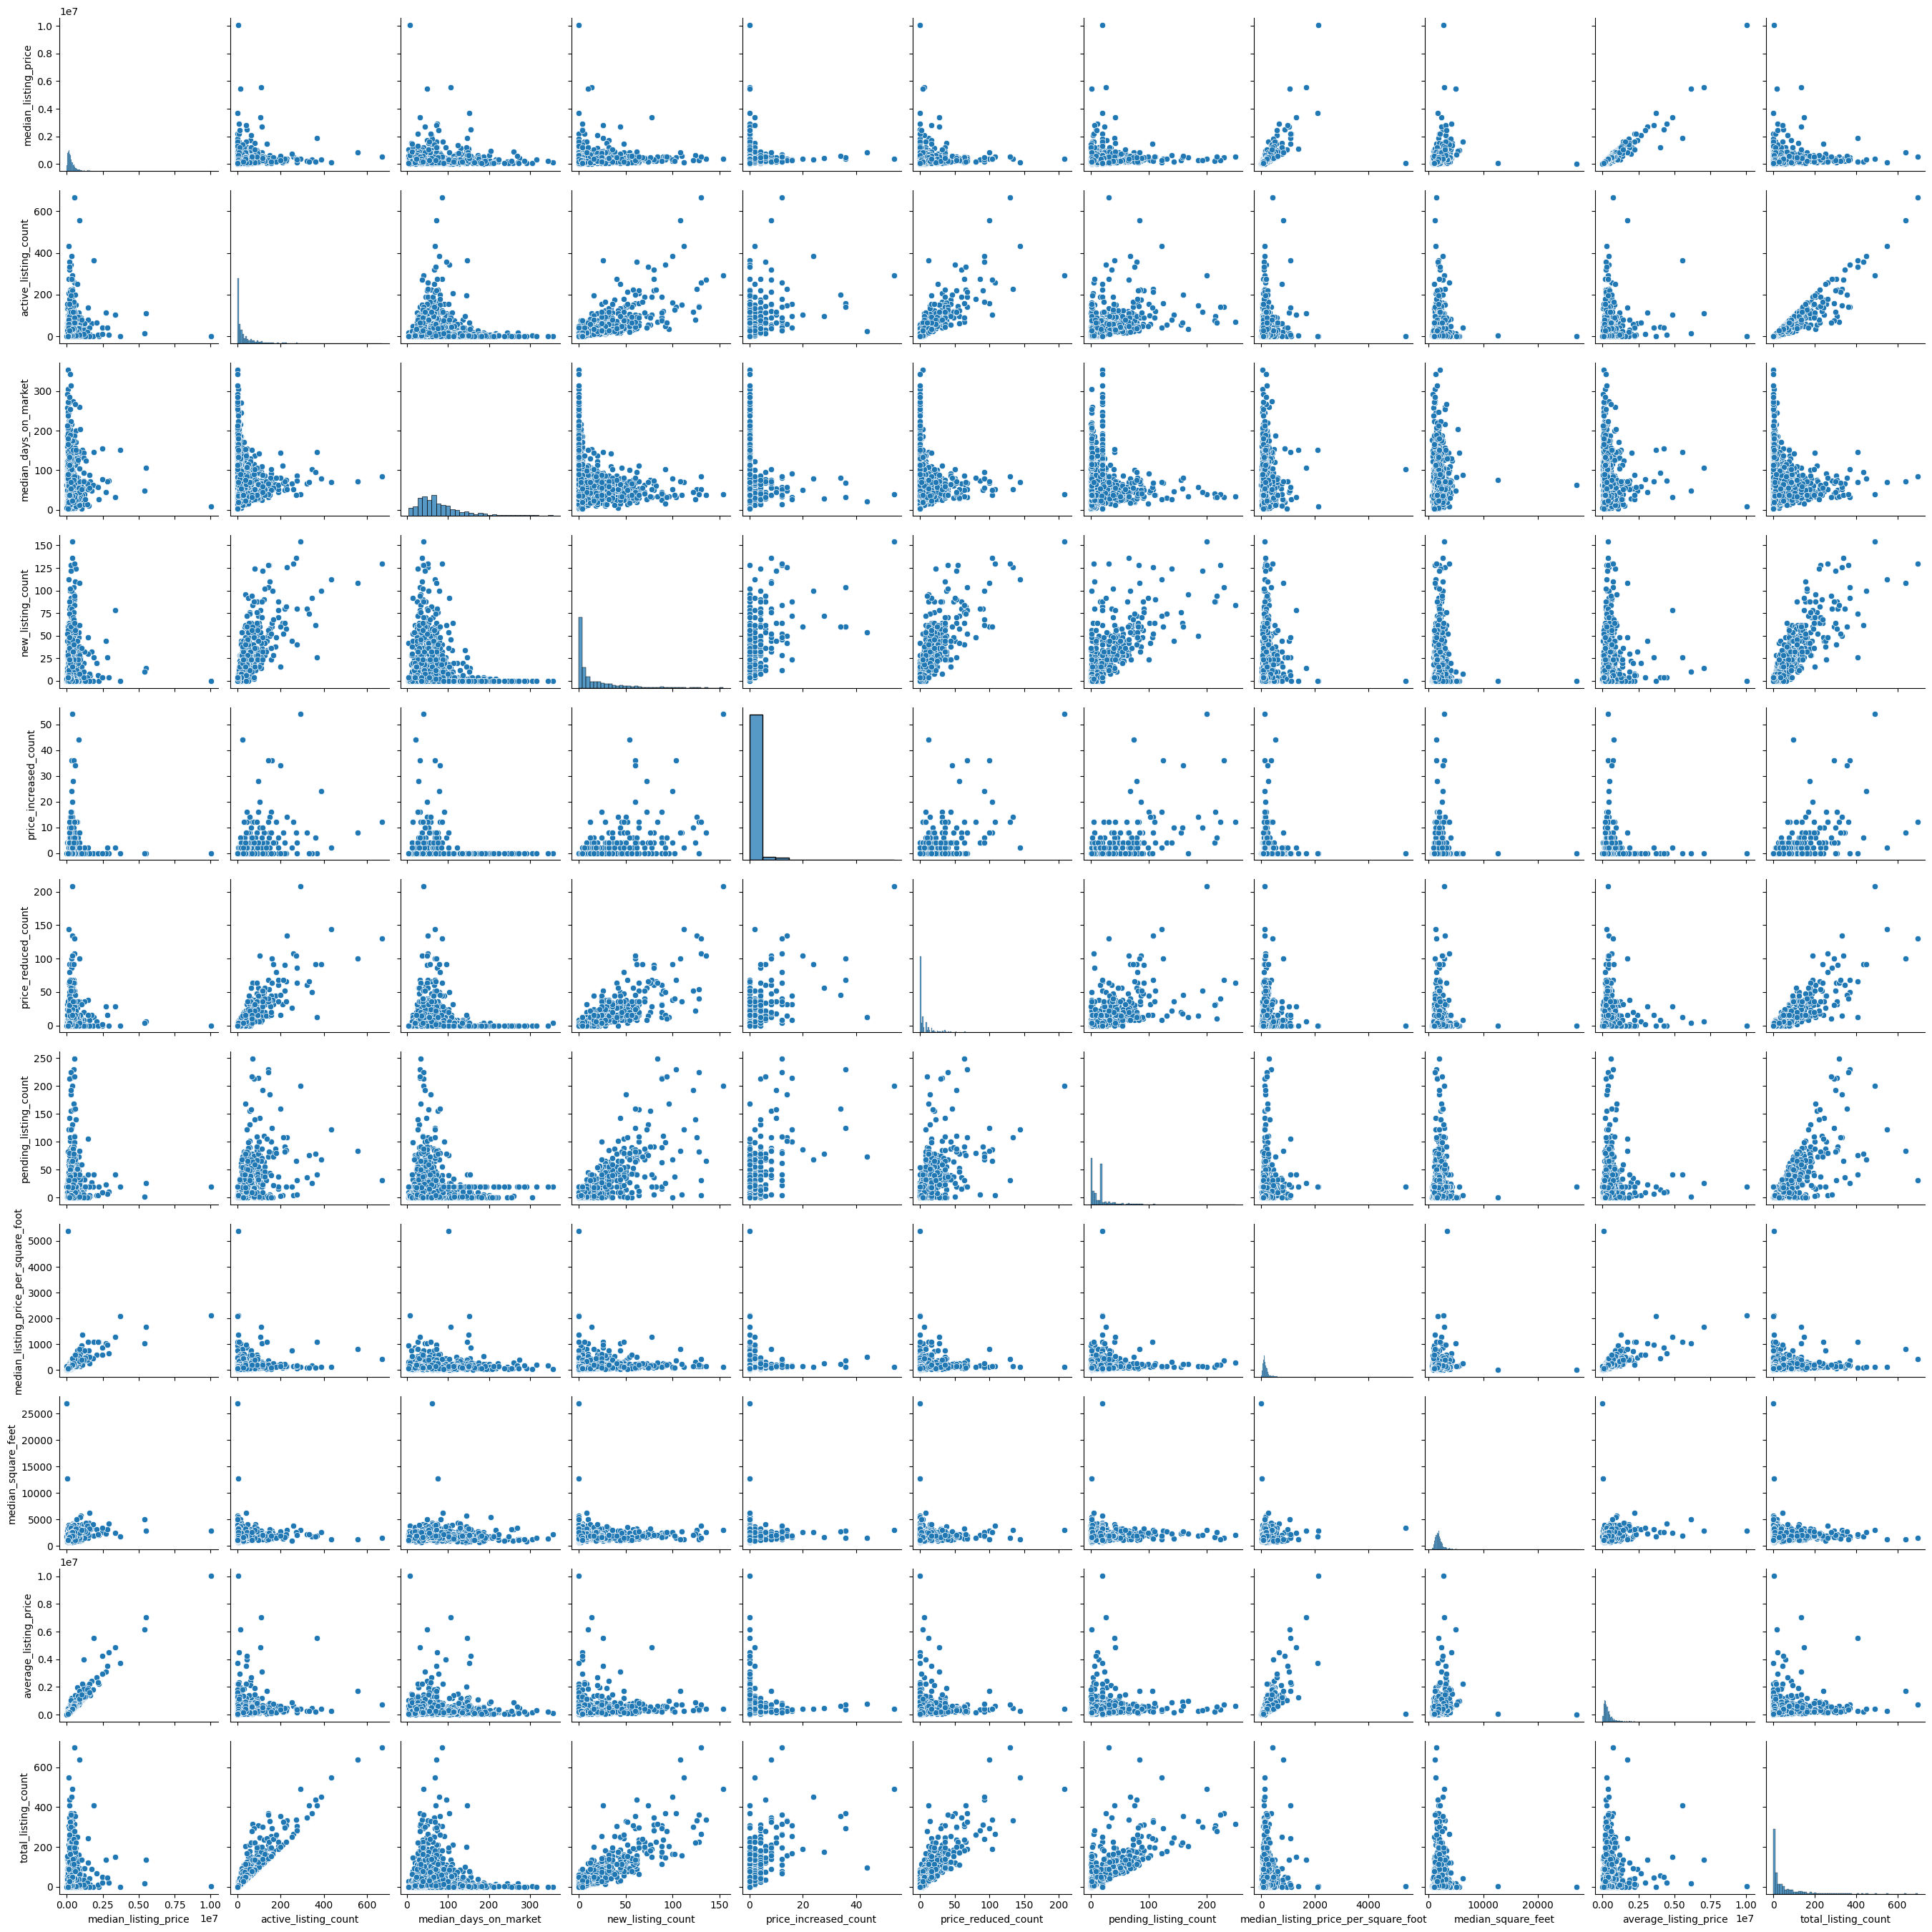

In [41]:
sns.pairplot(df_inventory_by_month_updated.sample(1000))

### A lot of the plots appear to have positive correlations, but some seem pretty flat where all the data points are close to the x or y axis. All column charts are right skewed with the exception of median days on market to median days on market, which shows more of a normal distribution. I would like to explore the plots where the data points are all along either the x or y axis to try to determine why that is.

In [42]:
# Creating smaller subsection to examine the variables with the strongest coeifficients. 

sub = df_inventory_by_month_updated[['average_listing_price', 'median_listing_price', 'total_listing_count', 'new_listing_count', 'price_reduced_count', 'active_listing_count', 'pending_listing_count', 'price_increased_count']]

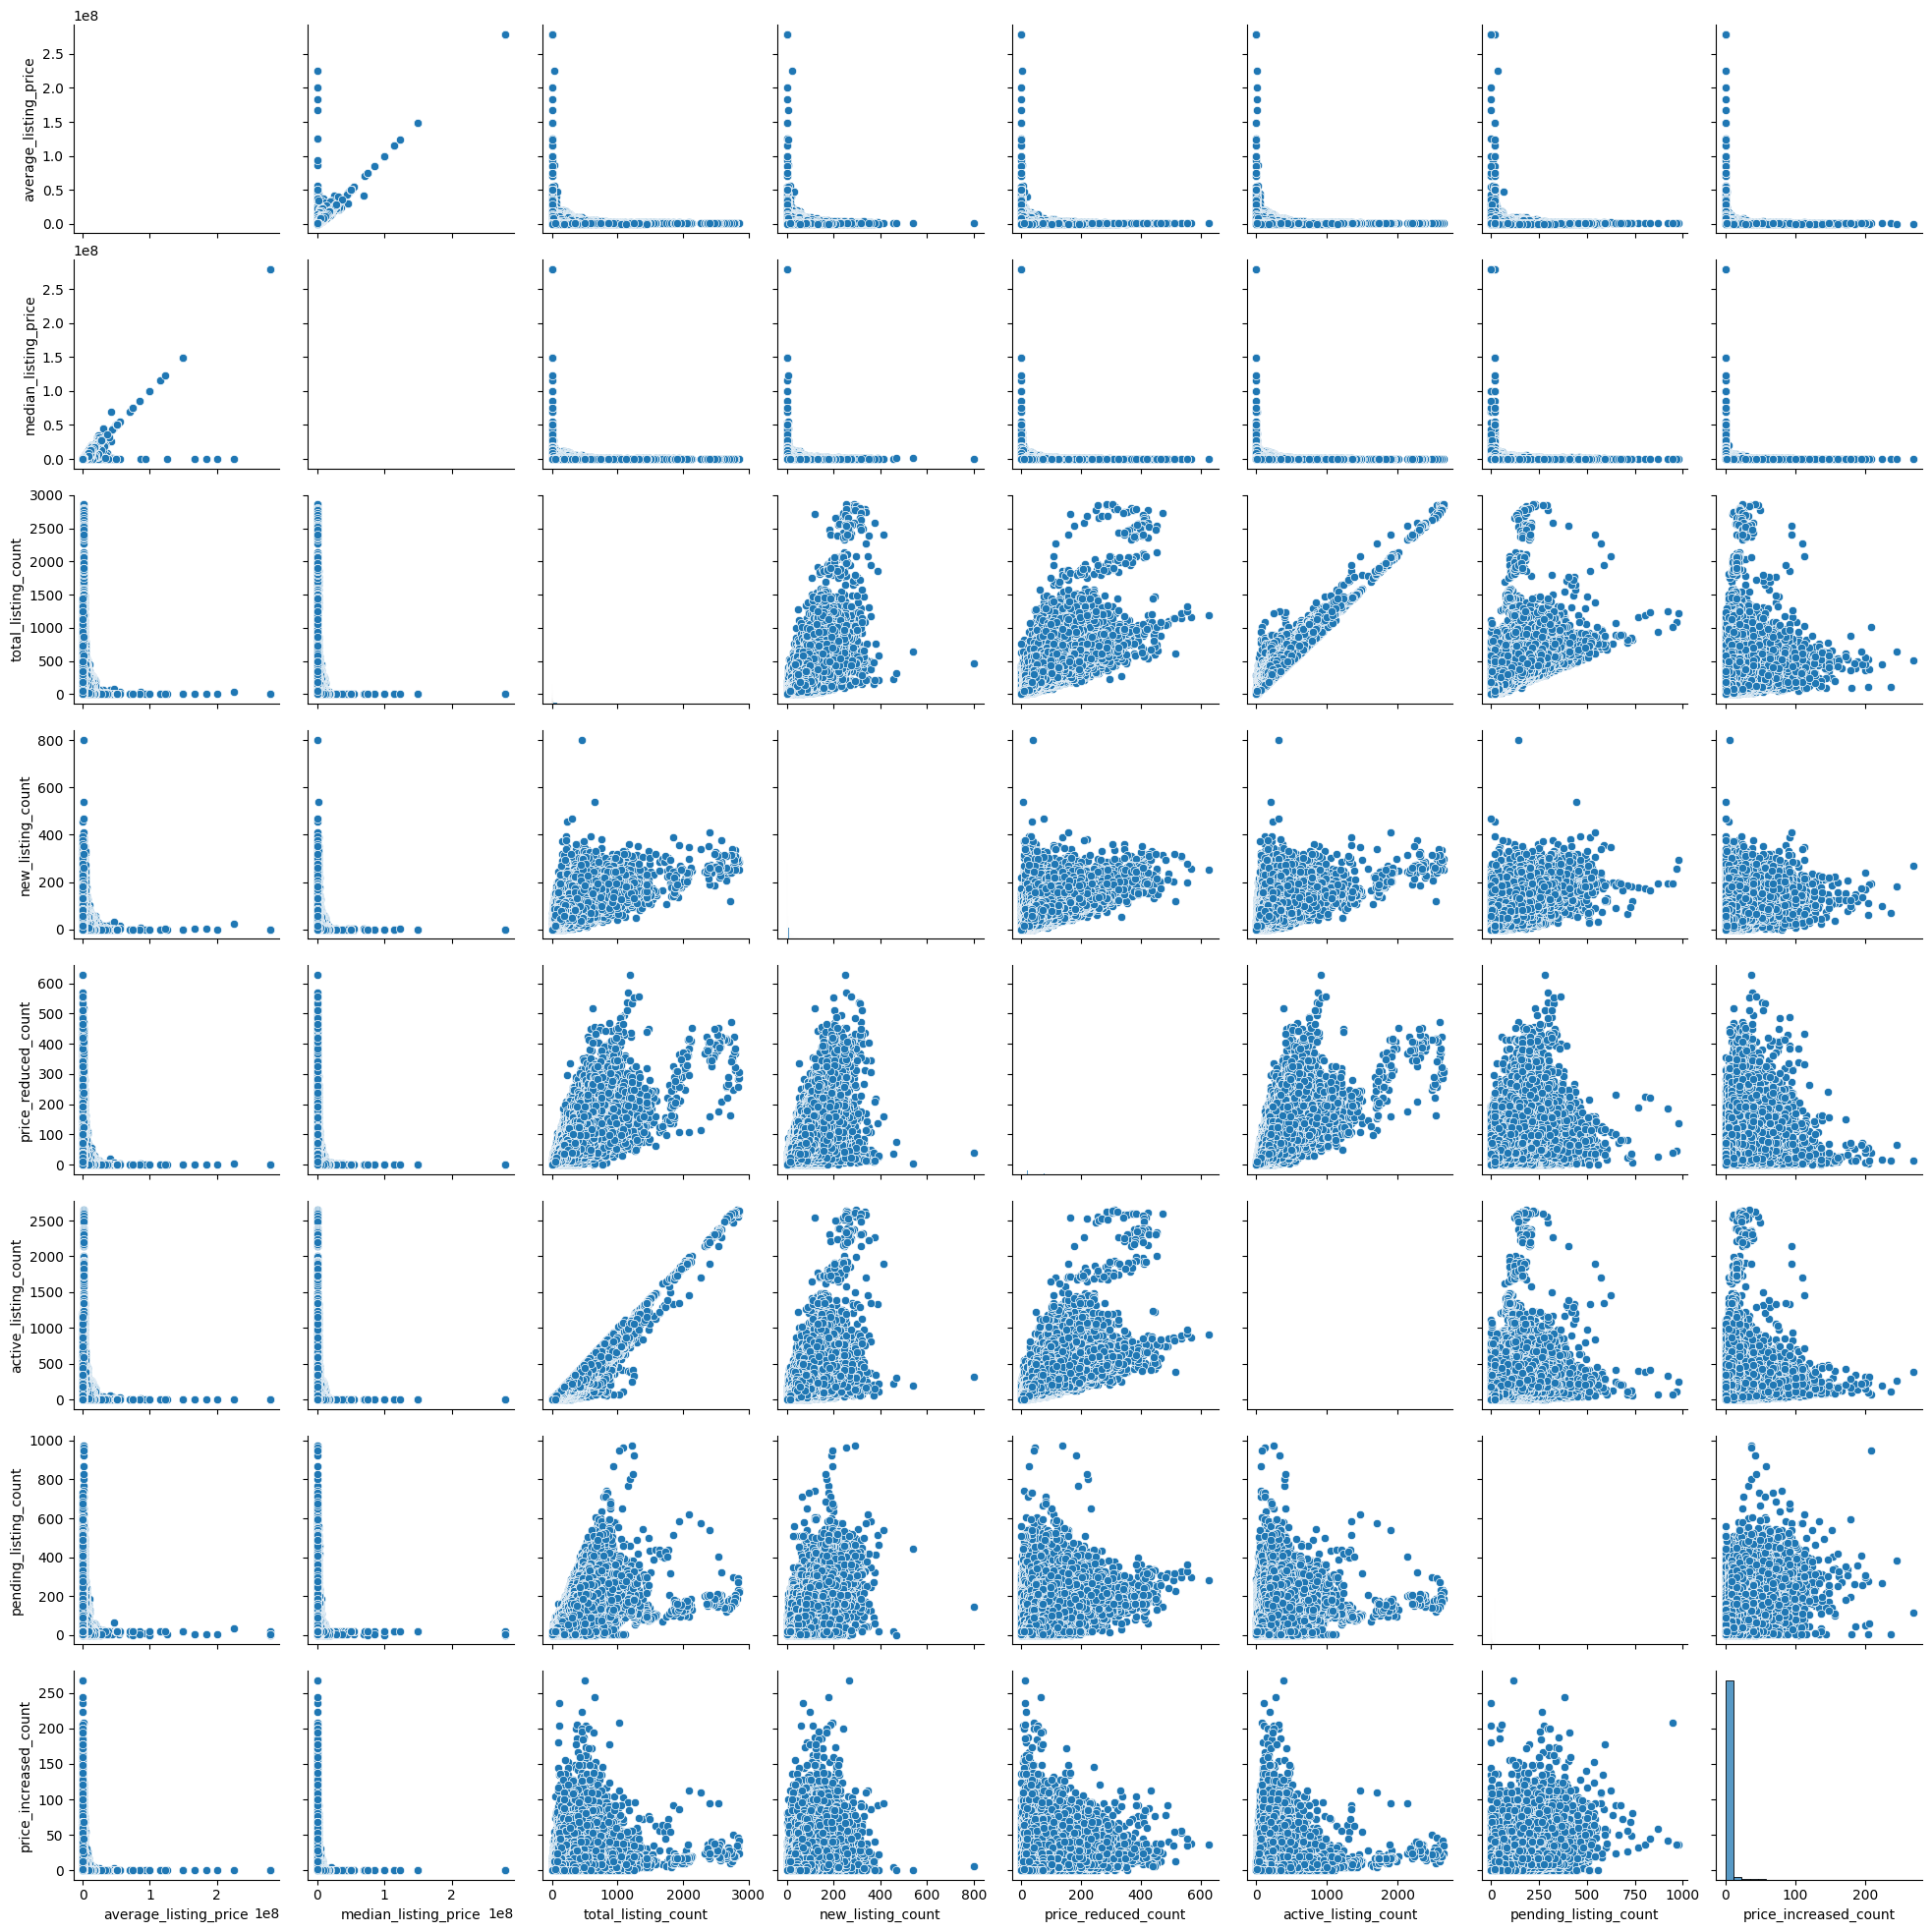

In [43]:
# Create a pair plot 

pairplot = sns.pairplot(sub)

In [54]:
pairplot.savefig('pairplot.png') 

### Categorical Plots:

##### Creating a categorical variable that splits the 'median_days_on_market' column into categories

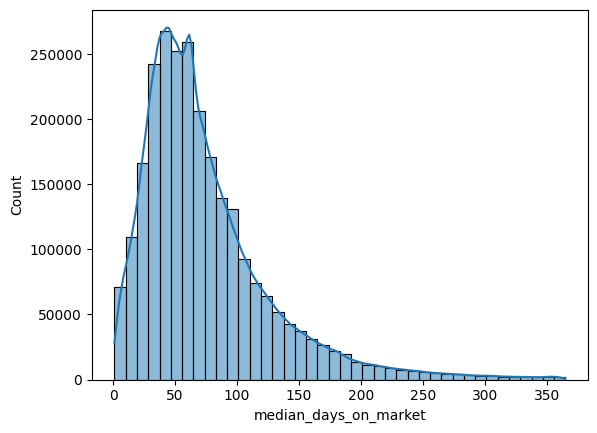

In [44]:
# Use a histogram to visualize the distribution of the variables. 

hist = sns.histplot(df_inventory_by_month_updated['median_days_on_market'], bins = 40, kde = True)

### The histogram shows that the majority of homes (over 250,000 homes) are on the market for 50 days. The histogram displays a more normal distribution and looks like a bell curve - a right skewed bell curve. 

In [41]:
df_inventory_by_month_updated.loc[df_inventory_by_month_updated['median_days_on_market'] < 20, 'days_on_market_category'] = 'low_days_on_market'

In [42]:
df_inventory_by_month_updated.loc[(df_inventory_by_month_updated['median_days_on_market'] >= 20) & (df_inventory_by_month_updated['median_days_on_market'] < 50), 'days_on_market_category'] = 'medium_days_on_market'

In [43]:
df_inventory_by_month_updated.loc[df_inventory_by_month_updated['median_days_on_market'] >= 50, 'days_on_market_category'] = 'high_days_on_market'

In [44]:
df_inventory_by_month_updated['days_on_market_category'].value_counts(dropna = False)

days_on_market_category
high_days_on_market      1638310
medium_days_on_market     758519
low_days_on_market        181000
Name: count, dtype: int64

In [45]:
df_inventory_by_month_updated.columns

Index(['month_date_yyyymm', 'zipcode', 'city_state', 'median_listing_price',
       'active_listing_count', 'median_days_on_market', 'new_listing_count',
       'price_increased_count', 'price_reduced_count', 'pending_listing_count',
       'median_listing_price_per_square_foot', 'median_square_feet',
       'average_listing_price', 'total_listing_count',
       'days_on_market_category'],
      dtype='object')

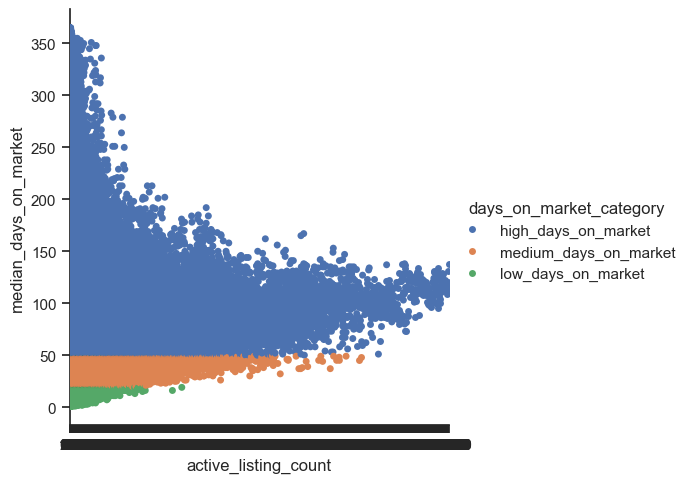

In [50]:
# Create a categorical plot in seaborn using the days_on_market_category created above

sns.set(style="ticks")
catplot = sns.catplot(x='active_listing_count', y='median_days_on_market', hue='days_on_market_category', data=df_inventory_by_month_updated)

In [56]:
catplot.savefig('median_days_to_active_listings.png') 

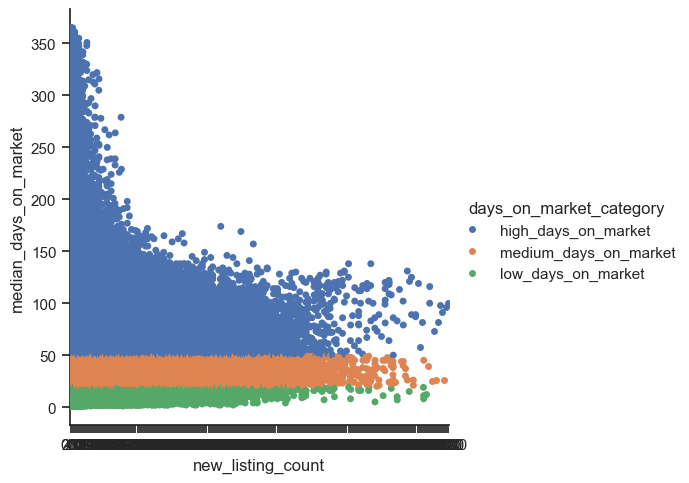

In [51]:
# Create a categorical plot in seaborn using the days_on_market_category created above

sns.set(style="ticks")
catplot_1 = sns.catplot(x='new_listing_count', y='median_days_on_market', hue='days_on_market_category', data=df_inventory_by_month_updated)

In [57]:
catplot_1.savefig('median_days_to_new_listings.png') 

In [ ]:
# Create a categorical plot in seaborn using the days_on_market_category created above

sns.set(style="ticks")
catplot_2 = sns.catplot(x='median_listing_price', y='median_days_on_market', hue='days_on_market_category', data=df_inventory_by_month_updated)

In [ ]:
catplot_2.savefig('median_days_to_median_list_price.png') 

### 7. So far my exploration has not answered my initial questions from 6.1 of Does the median list price fluctuate all year or only in certain months? and Is this the same for all states or does it vary by city and state? 

### 7. Some new questions that I can explore are:
#### Does the total active listings affect median list price?
#### Does the total active listings affect median_days_on_market?
#### Does the number of new listings affect median list price?

### 8. Define any hypotheses that I can at this point: 
#### 1.The higher the number of total active listings, the higher the median days on the market. 
#### 2. The higher the number of total listings, the more new listings there are.
#### 3. The higher the number of total listings, the higher probability that a listing will experience a price reduction. tings.

In [46]:
df_inventory_by_month_updated.head()

,month_date_yyyymm,zipcode,city_state,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_listing_price_per_square_foot,median_square_feet,average_listing_price,total_listing_count,days_on_market_category
0,202401,59259,"richey, mt",74000.0,2.0,59.0,0.0,0.0,0.0,19.93114,96.0,824.0,74000.0,2.0,high_days_on_market
1,202401,97369,"otter rock, or",28250.0,8.0,53.0,2.0,0.0,0.0,19.93114,29.0,947.0,130056.0,8.0,high_days_on_market
2,202401,4922,"burnham, me",187000.0,4.0,81.0,0.0,0.0,0.0,3.00000,178.0,907.0,207661.0,7.0,high_days_on_market
3,202401,49705,"afton, mi",84875.0,1.0,76.0,0.0,0.0,2.0,1.00000,91.0,903.0,84875.0,1.0,high_days_on_market
4,202401,11965,"shelter island heights, ny",3097500.0,4.0,113.0,0.0,0.0,0.0,19.93114,1666.0,1798.0,2830000.0,4.0,high_days_on_market


In [47]:
#Export my new dataframe as a pickle file
df_inventory_by_month_updated.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'RDC_inventory_by_month_updated.pkl'))